In [25]:
import keras

import tensorflow.keras.backend as K

def custom_loss(y_true, y_pred):
    """
    Custom loss function for the specified task.

    Parameters:
    - y_true: Ground truth values, of shape (batch_size, 2, N).
    - y_pred: Predicted values, of shape (batch_size, 7,N).

    Returns:
    - loss: Scalar value representing the mean loss over the batch.
    """

    # Extract x and y values from y_true
    x_values = y_true[:,:,0]  # Shape: (batch_size, N)
    y_values = y_true[:,:,1]  # Shape: (batch_size, N)
    
    # print(x_values)
    # Apply the function to each element of y_pred based on the corresponding x_value
    # Result shape: (batch_size, N)
    # function_values = (
    #     y_pred[:, 0, :] * K.exp(-(x_values + y_pred[:, 1, :]) / y_pred[:, 2, :]) +
    #     y_pred[:, 3, :] * K.exp(-(x_values + y_pred[:, 4, :]) / y_pred[:, 5, :]) +
    #     y_pred[:, 6, :]
    # )
    function_values = (
        y_pred[:, :,0] * K.exp(-(x_values ) * y_pred[:, :,1]) +
        y_pred[:, :,2] * K.exp(-(x_values ) * y_pred[:, :,3]) +
        y_pred[:, :,4]
    )
    print(function_values)
    # Compute the difference between the function values and y_values
    # Result shape: (batch_size, N)
    diff = function_values - y_values
    # print(diff)
    # Take the square of the differences
    squared_diff = K.square(diff)

    # Take the mean over the batch
    # Result shape: (batch_size,)
    loss = K.sum(squared_diff, axis=-1)

    return loss

def create_nn():
    global X_train, points
    # Input layer, the number of input nodes is governed by X_data.shape[1]
    # X_data.shape[1] is the number of columns in X_data
    inputs = keras.Input(shape=(X_train.shape[1],), name='input')

    # Dense layers with relu activations
    layers_dense = keras.layers.Dense(20, 'sigmoid')(inputs)
    # add a second dense layer with 50 hidden neurons and using the relu activation
    layers_dense2 = keras.layers.Dense(10, 'sigmoid')(layers_dense)
    # Output layer, only one output node is used
    parameters = keras.layers.Dense(5)(layers_dense2)
    # Expand parameters to have same shape as y_true
    expanded_parameters = keras.layers.RepeatVector(points)(parameters)


    return keras.Model(inputs=inputs, outputs=expanded_parameters, name="current_function_prediction")

In [26]:
import model_function
import numpy as np
import matplotlib.pyplot as plt
points = 5
x = np.linspace(0,100, points)
A1 = 1
A2= 1
t1 = 5
t2= 3

j0 = 2
input_parameters = np.array((A1,t1,A2,t2,j0))
y_pred = np.tile(input_parameters, (1, points, 1))
#y_pred = np.reshape(y_pred,(1, 7, points))
#print(y_pred)

y = model_function.double_exponential_function(x, input_parameters)
print(f'y = {y}')
y_true = np.column_stack((x,y))
#y_true = np.reshape(y_true, (2,points))
y_true = np.expand_dims(y_true, axis=0)
print(y_true.shape)


print(K.eval(custom_loss(K.variable(y_true), K.variable(y_pred))).sum())



y = [4. 2. 2. 2. 2.]
(1, 5, 2)
tf.Tensor([[4. 2. 2. 2. 2.]], shape=(1, 5), dtype=float32)
0.0


In [27]:
import pandas as pd

df = pd.read_csv('E_4_20ms_20231103_14_55_46.csv', sep=', ')
df.head()

C:\Users\cierpind\AppData\Local\Temp\ipykernel_5380\3313802033.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('E_4_20ms_20231103_14_55_46.csv', sep=', ')


,Ch1(mA),Ch2(mA),Ch3(mA),Ch4(mA),Ch5(mA),Ch6(mA),Ch7(mA),Ch8(mA),Ch9(mA),Ch10(mA),...,Ch14(mA),Ch15(mA),Ch16(mA),Channel state,On time,Off time,Pulse number,Pattern,Time,Probeflag
0,0,0,0,0.000000,0,0,0,0,0,0,...,0,0,0,1000000000000,20,10,1,1/160,0.022460,False
1,0,0,0,0.000000,0,0,0,0,0,0,...,0,0,0,1000000000000,20,10,2,1/160,0.053628,False
2,0,0,0,0.004888,0,0,0,0,0,0,...,0,0,0,1000000000000,20,10,3,1/160,0.088193,False
3,0,0,0,0.004888,0,0,0,0,0,0,...,0,0,0,1000000000000,20,10,4,1/160,0.119002,False
4,0,0,0,0.004888,0,0,0,0,0,0,...,0,0,0,1000000000000,20,10,5,1/160,0.145032,False


In [28]:
df = df[ ['Pattern','Time','Ch4(mA)','On time', 'Off time']]
df = df.rename(columns={'Ch4(mA)': 'Current'})
df.head()

,Pattern,Time,Current,On time,Off time
0,1/160,0.022460,0.000000,20,10
1,1/160,0.053628,0.000000,20,10
2,1/160,0.088193,0.004888,20,10
3,1/160,0.119002,0.004888,20,10
4,1/160,0.145032,0.004888,20,10


Text(0.5, 1.0, 'Data to be modeled')

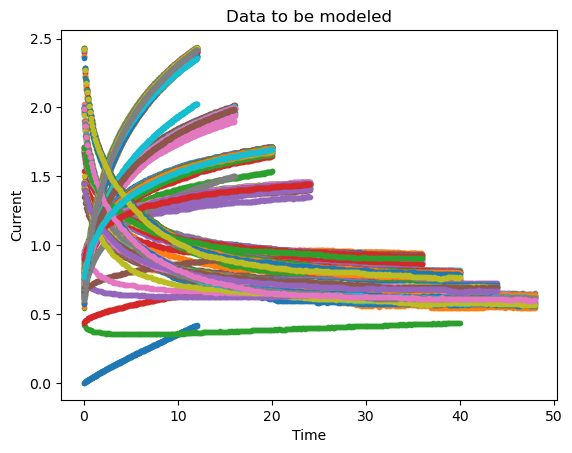

In [29]:
grouped = df.groupby('Pattern')
list_of_dfs = [group for _, group in grouped]
for data in list_of_dfs:    
    x_time = data['Time']-np.min(data['Time'])
    y_current = data['Current']
    points = len(y_current)    
    #(data.loc[0,'Off time'])
    assert x_time.shape == y_current.shape
    assert points == 400
    plt.plot(x_time, y_current, '.')
plt.xlabel('Time')
plt.ylabel('Current')
plt.title('Data to be modeled')

In [30]:
#initialize array of expected shape
X_data = np.zeros((len(list_of_dfs),4))
#initialize array of expected shape
y_data = np.zeros((len(list_of_dfs), points, 2))
print(f"X shape:{X_data.shape}")
print(f"y shape:{y_data.shape}")
for i in range(len(list_of_dfs)):
    data = list_of_dfs[i]
    x_time = data['Time']-np.min(data['Time'])
    y_current = data['Current']
    label = np.column_stack((x_time,y_current))
    
    y_data[i,:,:]= label
    features =  np.array([4, np.min(y_current.values), data['On time'].iloc[0], data['Off time'].iloc[0]])
    X_data[i,:] = features


X shape:(160, 4)
y shape:(160, 400, 2)


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, train_size=0.7, random_state = 0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, train_size=0.5, random_state = 0)

In [32]:
model = create_nn()
model.summary()

Model: "current_function_prediction"


_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 4)]               0         
                                                                 
 dense_6 (Dense)             (None, 20)                100       
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 5)                 55        
                                                                 
 repeat_vector_2 (RepeatVec  (None, 400, 5)            0         
 tor)                                                            
                                                                 
Total params: 365 (1.43 KB)
Trainable params: 365 (1.43 KB)
Non-trainable params: 0 (0.00 Byte)
______________________________________________

In [33]:
def compile_model(model):
    model.compile(optimizer='adam',
                  loss=custom_loss)
    
earlystopper = keras.callbacks.EarlyStopping(monitor="val_loss",baseline = 500, restore_best_weights= True)

compile_model(model)

import seaborn as sns
def plot_history(history, metrics):
    """
    Plot the training history

    Args:
        history (keras History object that is returned by model.fit())
        metrics (str, list): Metric or a list of metrics to plot
    """
    history_df = pd.DataFrame.from_dict(history.history)
    sns.lineplot(data=history_df[metrics])
    plt.xlabel("epochs")
    plt.ylabel("metric")



In [34]:
history = model.fit(X_train, y_train,
                    batch_size=5,
                    epochs=200,
                    validation_data = (X_val,y_val),
                    #callbacks=[earlystopper],
                    verbose=2)

Epoch 1/200
Tensor("custom_loss/add_1:0", shape=(None, 400), dtype=float32)
Tensor("custom_loss/add_1:0", shape=(None, 400), dtype=float32)
Tensor("custom_loss/add_1:0", shape=(None, 400), dtype=float32)
23/23 - 0s - loss: 185.5544 - val_loss: 120.5428 - 468ms/epoch - 20ms/step
Epoch 2/200
23/23 - 0s - loss: 68.8433 - val_loss: 60.2420 - 31ms/epoch - 1ms/step
Epoch 3/200
23/23 - 0s - loss: 45.3267 - val_loss: 33.1379 - 33ms/epoch - 1ms/step
Epoch 4/200
23/23 - 0s - loss: 36.6737 - val_loss: 22.5768 - 32ms/epoch - 1ms/step
Epoch 5/200
23/23 - 0s - loss: 30.8535 - val_loss: 18.2077 - 31ms/epoch - 1ms/step
Epoch 6/200
23/23 - 0s - loss: 28.7724 - val_loss: 16.9501 - 33ms/epoch - 1ms/step
Epoch 7/200
23/23 - 0s - loss: 26.6285 - val_loss: 14.2151 - 33ms/epoch - 1ms/step
Epoch 8/200
23/23 - 0s - loss: 25.2765 - val_loss: 14.1655 - 33ms/epoch - 1ms/step
Epoch 9/200
23/23 - 0s - loss: 24.8328 - val_loss: 13.9843 - 30ms/epoch - 1ms/step
Epoch 10/200
23/23 - 0s - loss: 26.0802 - val_loss: 10.88

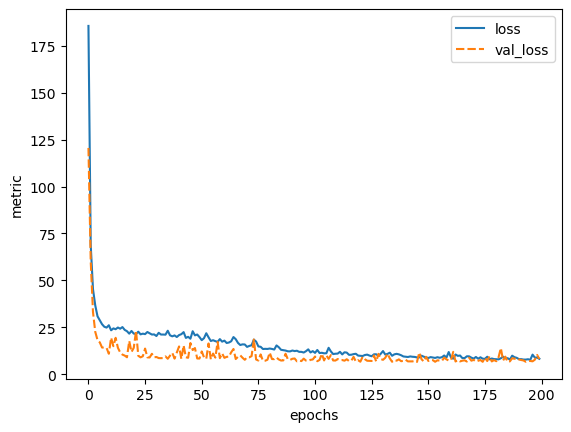

In [35]:
# call the plot_history function with the apropriate object and string
plot_history(history, ['loss', 'val_loss'])

In [36]:
# make prediction on test data
y_train_prediction = model.predict(X_train)



4/4 [==============================] - 0s 665us/step


4/4 [==============================] - 0s 0s/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Relative error of training data prediction')

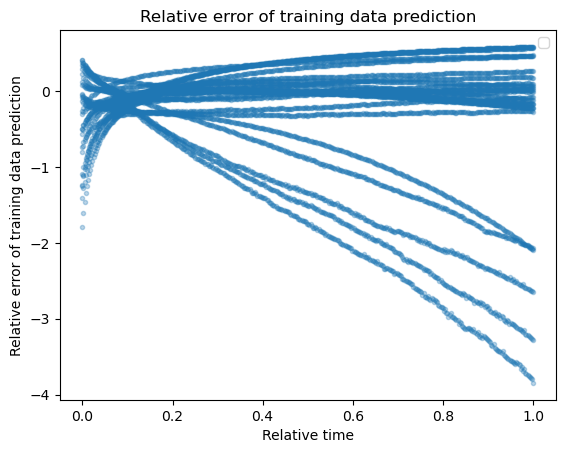

In [37]:
y_train_prediction = model.predict(X_train)

# from matplotlib.pyplot import cm
# color = iter(cm.rainbow(np.linspace(0, 1, X_test.shape[0]-5)))
for test_entry_index in range(X_test.shape[0]):
    # c = next(color)
    y_true = y_test[test_entry_index,:,:]
    param_predicted = y_train_prediction[test_entry_index,0 ,: ]
    plt.plot(y_true[:,0]/np.max(y_true), (y_true[:,1]- model_function.double_exponential_function(y_true[:,0], param_predicted))/y_true[:,1], '.', color = 'C0', alpha = 0.3, )
    # plt.plot(y_true[:,0], y_true[:,1], '-', color = 'C0', alpha = 0.7)
    # plt.plot(y_true[:,0], model_function.double_exponential_function(y_true[:,0], param_predicted), '-', color = 'C1')
plt.legend()
plt.xlabel('Relative time')
plt.ylabel('Relative error of training data prediction')
plt.title('Relative error of training data prediction')

1/1 [==============================] - 0s 10ms/step


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Relative error of test data prediction')

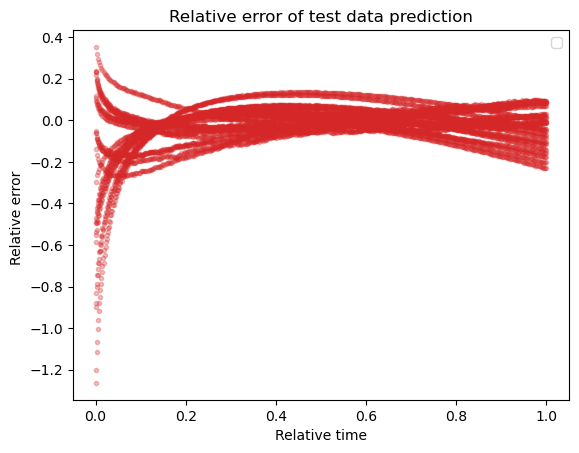

In [38]:
y_test_prediction = model.predict(X_test)

# from matplotlib.pyplot import cm
# color = iter(cm.rainbow(np.linspace(0, 1, X_test.shape[0]-5)))
for test_entry_index in range(X_test.shape[0]):
    # c = next(color)
    y_true = y_test[test_entry_index,:,:]
    param_predicted = y_test_prediction[test_entry_index,0 ,: ]
    plt.plot(y_true[:,0]/np.max(y_true), (y_true[:,1]- model_function.double_exponential_function(y_true[:,0], param_predicted))/y_true[:,1], '.', color = 'C3', alpha = 0.3, )
    # plt.plot(y_true[:,0], y_true[:,1], '-', color = 'C0', alpha = 0.7)
    # plt.plot(y_true[:,0], model_function.double_exponential_function(y_true[:,0], param_predicted), '-', color = 'C1')
plt.legend()
plt.xlabel('Relative time')
plt.ylabel('Relative error ')
plt.title('Relative error of test data prediction')